# Target Store (Brazil) Data Analysis

### About the company

Target is a globally recognized brand and a leading retailer in the United States, known for offering exceptional value, inspiration, innovation, and a unique shopping experience.

### Data source

This dataset focuses on Target's operations in Brazil, covering 100,000 orders placed between 2016 and 2018. It includes detailed information on order status, pricing, payment and shipping performance, customer locations, product attributes, and customer reviews.

This dataset is available at Kaggle (https://www.kaggle.com/datasets/devarajv88/target-dataset/data)

### Data organization

The data is available in 7 csv files with each file having multiple columns. Each csv file has one or more column in common with another and as key for joining the datasets.

## Objective

To answer general queries given to a data analyst by the senior management (hypothetical scenario). <br> 
Create visualizations and answer the questions. <br>
Give recommendations and conclusions.

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
import statistics as stat

In [2]:
# connecting to MySQL using python

db = mysql.connector.connect(host="localhost",
                            username='root',
                            password='ABCd123410',
                            database='ecommerce')

cur = db.cursor()

## Basic Queries

> 1. List all unique cities where customers are located.

In [3]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()



In [4]:
data = pd.DataFrame(data, columns=['City'])
print(data.head())
print('Total number of cities where the stores are located are: ', data.value_counts().sum())

                    City
0                 franca
1  sao bernardo do campo
2              sao paulo
3        mogi das cruzes
4               campinas
Total number of cities where the stores are located are:  4119


> 2. Count the number of orders placed in 2017.*

In [5]:
query1 = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query1)

data1 = cur.fetchall()
data1

[(45101,)]

In [6]:
print('Total number of orders placed in 2017: ', data1[0][0])

Total number of orders placed in 2017:  45101


> 3. Find the total sales per category.

In [7]:
query2 = """ select upper(products.product_category) category, round(sum(payments.payment_value),2) sales 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category """

cur.execute(query2)

data2 = cur.fetchall()
data2

[('PERFUMERY', 506738.66),
 ('FURNITURE DECORATION', 1430176.39),
 ('TELEPHONY', 486882.05),
 ('FASHION BAGS AND ACCESSORIES', 218158.28),
 ('BED TABLE BATH', 1712553.67),
 ('AUTOMOTIVE', 852294.33),
 ('COMPUTER ACCESSORIES', 1585330.45),
 ('HOUSEWARES', 1094758.13),
 ('BABIES', 539845.66),
 ('TOYS', 619037.69),
 ('FURNITURE OFFICE', 646826.49),
 ('COOL STUFF', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('PET SHOP', 311268.97),
 ('GENERAL INTEREST BOOKS', 64694.76),
 ('STATIONARY STORE', 317440.07),
 ('WATCHES PRESENT', 1429216.68),
 ('PCS', 279121.55),
 ('CLIMATIZATION', 91170.66),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 241475.63),
 ('SPORT LEISURE', 1392127.56),
 ('BAGS ACCESSORIES', 187151.29),
 ('ELECTRONICS', 259857.1),
 ('CASA CONSTRUCAO', 136645.29),
 ('GAMES CONSOLES', 195480.38),
 ('HOME APPLIANCES', 95532.27),
 ('GARDEN TOOLS', 838280.75),
 ('AGRO INDUSTRIA E COMERCIO', 118730.61),
 (None, 252801.71),
 ('AUDIO', 60324.62),
 ('TECHNICAL BOOKS', 24915.44),
 ('CONSTRUCTION TOOLS 

In [8]:
df_data2 = pd.DataFrame(data2, columns=['category','total_sales'])
df_data2.shape

print('There are', df_data2.shape[0], 'categories of products')

There are 74 categories of products


> 4. Calculate the percentage of orders that were paid in installments.

In [9]:
query3 = """ 
select (sum(case when payment_installments >= 2 then 1 else 0 end))/count(*)*100 from payments 
"""

cur.execute(query3)

data3 = cur.fetchall()
data3[0][0]

Decimal('49.4176')

In [10]:
print(round(data3[0][0],0), 'percent of the products were paid in installments of 2 or more (single payments are not included)')

49 percent of the products were paid in installments of 2 or more (single payments are not included)


> 5. Count the number of customers from each state. 

In [11]:
query4 = """ select customer_state, count(customer_id) 
from customers group by customer_state"""

cur.execute(query4)

data4 = cur.fetchall()

df_data4 = pd.DataFrame(data4, columns=['state', 'total_customers'])

In [12]:
df_data4 = df_data4.sort_values(by=['total_customers'],ascending=False)

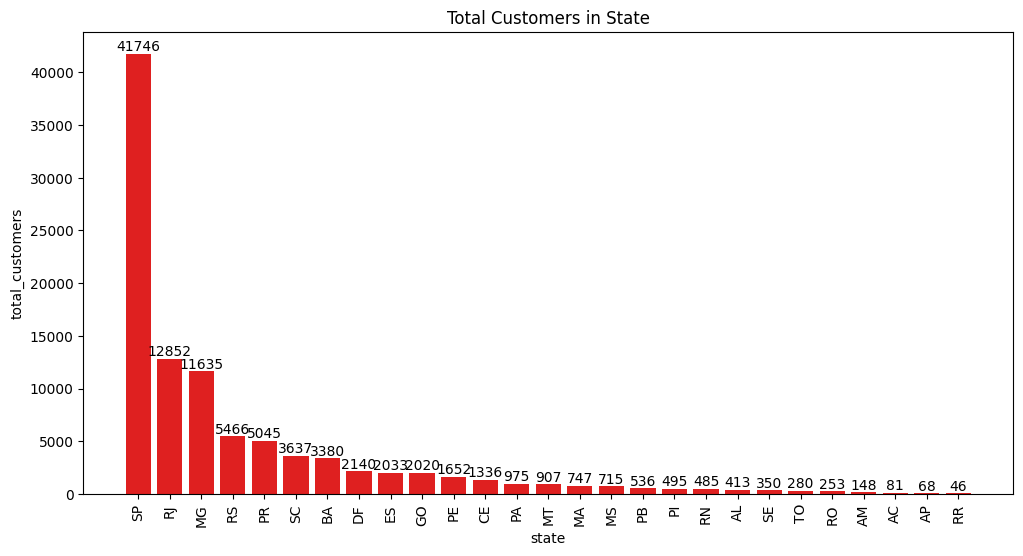

In [13]:
plt.figure(figsize = (12, 6))

ax = sns.barplot(data= df_data4,
           x= 'state',
           y= 'total_customers',
           #hue= 'state',
           #palette='viridis',
           color='red')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom' if height < ax.get_ylim()[1] * 0.99 else 'top',
            rotation=0,
            fontsize=10,
            color='black'
        )

plt.title('Total Customers in State')
plt.margins(x=0.05)
plt.xticks(rotation=90)
plt.show()

Most number of customers are in SP (Sao Paulo). The number of customers in SP are more than the next three, RJ, MG, and RS (Rio de Janerio, Minas Gerais, and Rio Grande do Sul ) combined.

## Intermediate Queries

> 1. Calculate the number of orders per month in 2018.

In [14]:
query5 = """ 
select monthname(order_purchase_timestamp) months, count(order_id) 
from orders 
where year(order_purchase_timestamp) = 2018 
group by months
"""

cur.execute(query5)

data5 = cur.fetchall()
data5

[('July', 6292),
 ('August', 6512),
 ('February', 6728),
 ('June', 6167),
 ('March', 7211),
 ('January', 7269),
 ('May', 6873),
 ('April', 6939),
 ('September', 16),
 ('October', 4)]

In [15]:
df_data5 = pd.DataFrame(data5, columns=['month_2018', 'total_orders'])

In [16]:
df_data5.sort_values(by=['total_orders'],ascending=False)

,month_2018,total_orders
5,January,7269
4,March,7211
7,April,6939
6,May,6873
2,February,6728
1,August,6512
0,July,6292
3,June,6167
8,September,16
9,October,4


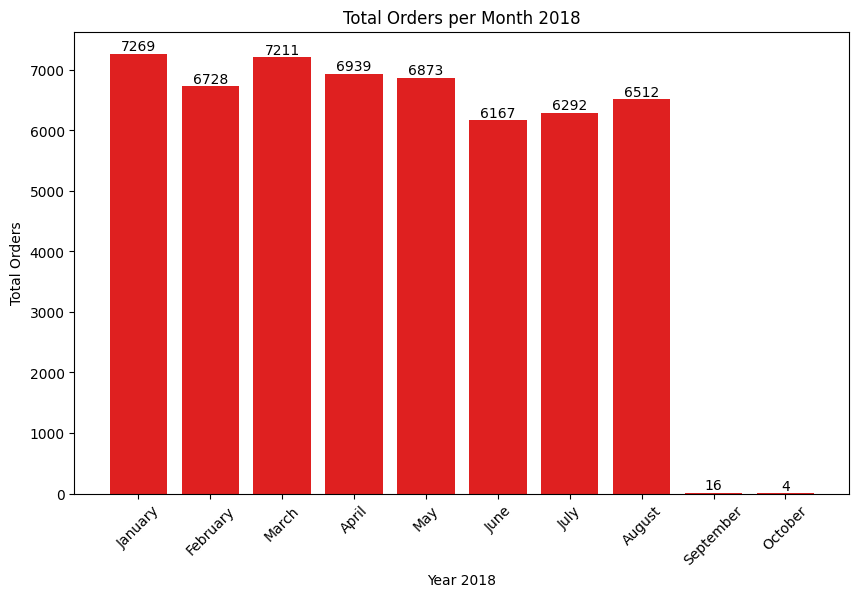

In [17]:
plt.figure(figsize = (10, 6))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October']

ax = sns.barplot(data= df_data5,
           x= 'month_2018',
           y= 'total_orders',
           #hue='month_year2018',
           #palette = 'magma',
           order = month_order,
           color='red')

for i in ax.containers:
    ax.bar_label(i,)
plt.title('Total Orders per Month 2018')
plt.ylabel('Total Orders')
plt.xlabel('Year 2018')
plt.margins(x=0.05)
plt.xticks(rotation=45)
plt.show()

There were no orders recorded in the dataset for October onwards. 

The number of orders placed from January to June were almost similar, but a sharp drop in September. 
This can be due to record not having being recieved and recorded yet in the database.

> 2. Find the average number of products per order, grouped by customer city.

In [18]:
query6 = """ 
with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items on 
orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city

"""

cur.execute(query6)

data6 = cur.fetchall()
data6

[('sao jose dos campos', Decimal('1.14')),
 ('indaial', Decimal('1.12')),
 ('treze tilias', Decimal('1.27')),
 ('sao paulo', Decimal('1.16')),
 ('rio de janeiro', Decimal('1.15')),
 ('mario campos', Decimal('1.33')),
 ('guariba', Decimal('1.00')),
 ('cuiaba', Decimal('1.20')),
 ('franca', Decimal('1.25')),
 ('tocos', Decimal('1.00')),
 ('januaria', Decimal('1.18')),
 ('embu-guacu', Decimal('1.24')),
 ('cerquilho', Decimal('1.17')),
 ('belo horizonte', Decimal('1.14')),
 ('taubate', Decimal('1.13')),
 ('arcos', Decimal('1.12')),
 ('monte mor', Decimal('1.08')),
 ('vianopolis', Decimal('1.33')),
 ('sao jose da tapera', Decimal('1.00')),
 ('belford roxo', Decimal('1.09')),
 ('pedro leopoldo', Decimal('1.25')),
 ('arroio do sal', Decimal('1.29')),
 ('sao bernardo do campo', Decimal('1.14')),
 ('brasilia', Decimal('1.13')),
 ('ribeirao pires', Decimal('1.12')),
 ('contagem', Decimal('1.14')),
 ('feira de santana', Decimal('1.06')),
 ('fortaleza', Decimal('1.12')),
 ('piracicaba', Decimal('1

In [19]:
df_data6 = pd.DataFrame(data6, 
                        columns=['city', 'avg_products_per_order'])

df_data6.sort_values('avg_products_per_order',
                            ascending=False).head()

,city,avg_products_per_order
2540,padre carvalho,7.00
1533,celso ramos,6.50
3076,candido godoi,6.00
3898,datas,6.00
3543,matias olimpio,5.00


In [20]:
avg_prod = df_data6['avg_products_per_order'].mean()
max_prod = df_data6['avg_products_per_order'].max()

print('On average,', round(avg_prod,2), 'products are ordered by customers in cities.')
print('Maximum average number of products ordered was', round(max_prod,2))

On average, 1.12 products are ordered by customers in cities.
Maximum average number of products ordered was 7.00


> 3. Calculate the percentage of total revenue contributed by each product category.

In [21]:
query7 = """ select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select round(sum(payment_value), 2) from payments))*100 , 2) percentage_revenue 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id

group by category order by percentage_revenue desc

"""

cur.execute(query7)

data7 = cur.fetchall()
data7

[('BED TABLE BATH', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('COMPUTER ACCESSORIES', 9.9),
 ('FURNITURE DECORATION', 8.93),
 ('WATCHES PRESENT', 8.93),
 ('SPORT LEISURE', 8.7),
 ('HOUSEWARES', 6.84),
 ('AUTOMOTIVE', 5.32),
 ('GARDEN TOOLS', 5.24),
 ('COOL STUFF', 4.87),
 ('FURNITURE OFFICE', 4.04),
 ('TOYS', 3.87),
 ('BABIES', 3.37),
 ('PERFUMERY', 3.17),
 ('TELEPHONY', 3.04),
 ('STATIONARY STORE', 1.98),
 ('PET SHOP', 1.94),
 ('PCS', 1.74),
 ('ELECTRONICS', 1.62),
 (None, 1.58),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 1.51),
 ('MUSICAL INSTRUMENTS', 1.46),
 ('ELECTROSTILE', 1.41),
 ('FASHION BAGS AND ACCESSORIES', 1.36),
 ('FIXED TELEPHONY', 1.29),
 ('GAMES CONSOLES', 1.22),
 ('BAGS ACCESSORIES', 1.17),
 ('ROOM FURNITURE', 0.85),
 ('CASA CONSTRUCAO', 0.85),
 ('ELECTRICES 2', 0.78),
 ('AGRO INDUSTRIA E COMERCIO', 0.74),
 ('HOME APPLIANCES', 0.6),
 ('CLIMATIZATION', 0.57),
 ('HOUSE COMFORT', 0.53),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 0.47),
 ('CONSTRUCTION TOOLS ILLUMINATION',

In [22]:
df_data7 = pd.DataFrame(data7, columns=['product_category', 'percentage_revenue'])
df_data7.head()

,product_category,percentage_revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


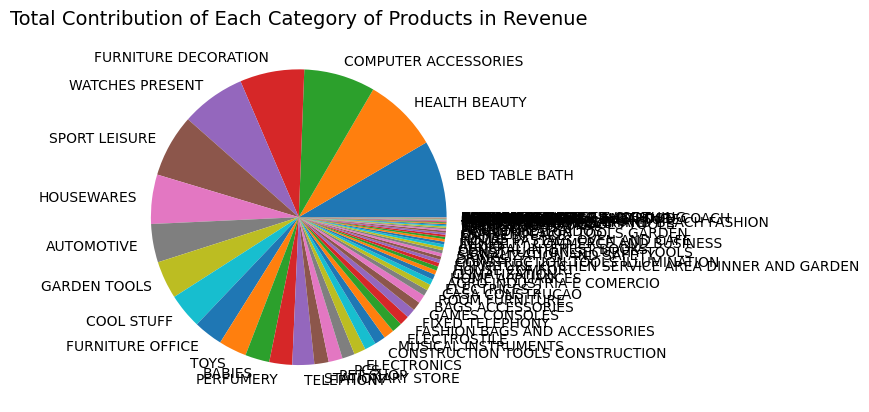

In [23]:
plt.pie(df_data7['percentage_revenue'], labels=df_data7['product_category'] ) 
  
# displaying chart 
plt.title('Total Contribution of Each Category of Products in Revenue', fontsize=14)
plt.show() 

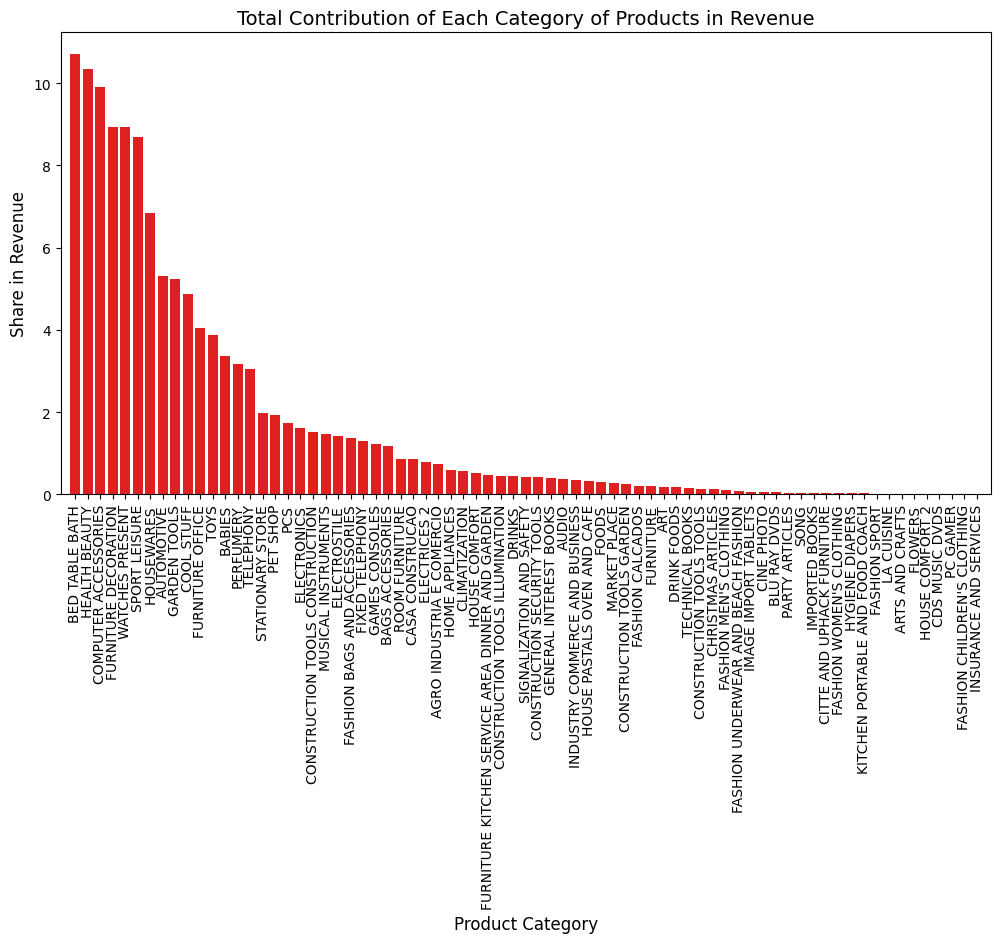

In [24]:
plt.figure(figsize = (12, 6))

sns.barplot(data= df_data7,
           x= 'product_category',
           y= 'percentage_revenue',
           #hue= 'state',
           #palette='viridis',
           color='red')

plt.title('Total Contribution of Each Category of Products in Revenue', fontsize=14)
plt.ylabel('Share in Revenue', fontsize=12)
plt.xlabel('Product Category', fontsize=12)

plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.show()

Pie chart is not an ideal choice if the number of variables exceed 8-10. 

It can be observed that `BED TABLE BATH` and `HEALTH BEAUTY` have the greatest share in the revenue

> 4. Identify the correlation between product price and the number of times a product has been purchased.

In [25]:
query8 = """ 
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items on products.product_id = order_items.product_id

group by products.product_category
"""

cur.execute(query8)

data8 = cur.fetchall()

In [26]:
df_data8 = pd.DataFrame(data8, columns=['product_category','items_ordered','avg_price'])
df_data8.head()

,product_category,items_ordered,avg_price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14


In [27]:
# finding correlation using Numpy

np.corrcoef([df_data8['items_ordered'], df_data8['avg_price']])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

In [28]:
# Using pandas
df_data8.corr(numeric_only=True)

,items_ordered,avg_price
items_ordered,1.000000,-0.106315
avg_price,-0.106315,1.000000


*There doesn't seem to be any noticeable relationship between the number of orders placed and the price of the item.*

> 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [29]:
query9 = """ select *, dense_rank() over(order by revenue desc) as rn from

(select order_items.seller_id , sum(payments.payment_value) revenue

from order_items join payments

on order_items.order_id = payments.order_id

group by order_items.seller_id) as a

"""

cur.execute(query9)

data9 = cur.fetchall()

In [30]:
df_data9 = pd.DataFrame(data9, columns=['seller_id','revenue','rank'])
df_data9.head(10)

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
5,da8622b14eb17ae2831f4ac5b9dab84a,272219.319315,6
6,4869f7a5dfa277a7dca6462dcf3b52b2,264166.120939,7
7,955fee9216a65b617aa5c0531780ce60,236322.300502,8
8,fa1c13f2614d7b5c4749cbc52fecda94,206513.229870,9
9,7e93a43ef30c4f03f38b393420bc753a,185134.209706,10


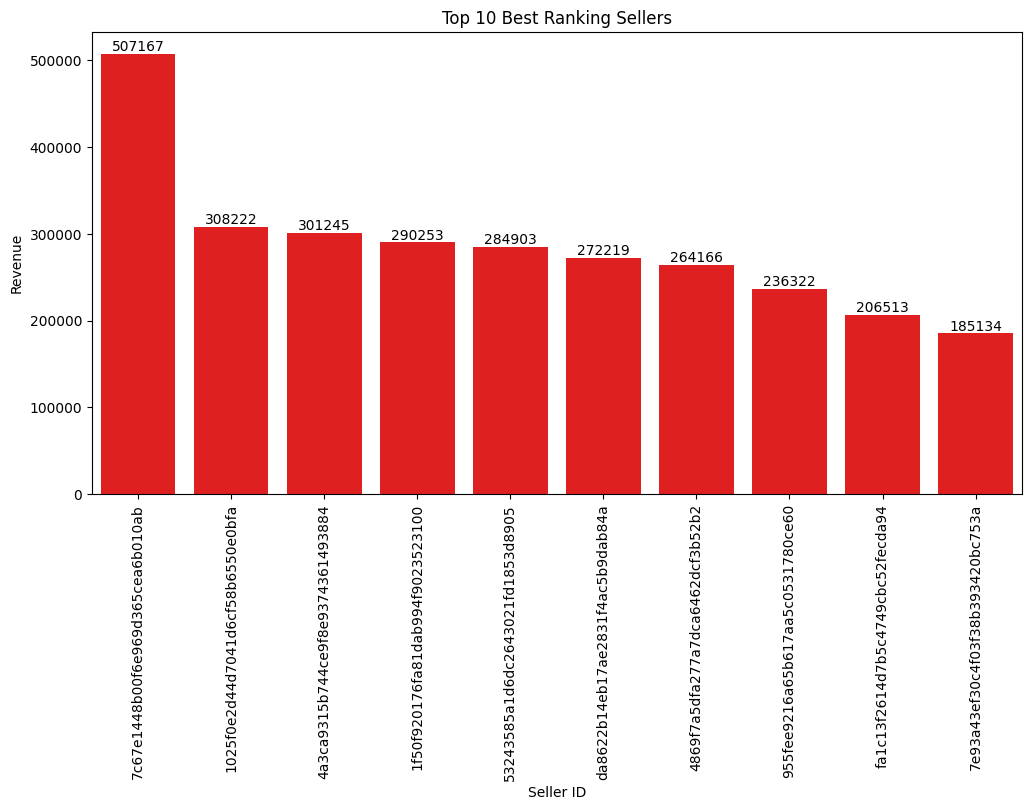

In [31]:
plt.figure(figsize = (12, 6))

ax = sns.barplot(data= df_data9.head(10),
           x= 'seller_id',
           y= 'revenue',
           
           #hue= 'state',
           #palette='viridis',
           color='red')

ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Top 10 Best Ranking Sellers')
plt.xlabel('Seller ID')
plt.ylabel('Revenue')

plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.show()

## Advanced Queries

> 1. Calculate the moving average of order values for each customer over their order history.

Moving Average is defined as - <br>
*In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different selections of the full data set.*

In [32]:
query10 = """ 
select customer_id, order_purchase_timestamp, 
round(avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row),2) as mov_avg

from 

(SELECT orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment

from payments join orders 
on payments.order_id = orders.order_id) as a

"""

cur.execute(query10)

data10 = cur.fetchall()

In [33]:
df_data10 = pd.DataFrame(data10, columns=['customer_id','order_purchase_timestamp','moving_avg'])
df_data10.head(10)

,customer_id,order_purchase_timestamp,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71


In [34]:
df_data10.sort_values(by='moving_avg', ascending=False )

,customer_id,order_purchase_timestamp,moving_avg
8959,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,13664.08
96143,ec5b2ba62e574342386871631fafd3fc,2018-07-15 14:49:44,7274.88
81022,c6e2731c5b391845f6800c97401a43a9,2017-02-12 20:37:36,6929.31
99394,f48d464a0baaea338cb25f816991ab1f,2018-07-25 18:10:17,6922.21
25946,3fd6777bbce08a352fddd04e4a7cc8f6,2017-05-24 18:14:34,6726.66
...,...,...,...
5248,0d14d28bc941474750feb2e030e54460,2017-10-22 00:31:28,0.01
27202,430ec51e3c42def76f0d79a8edb21784,2017-10-13 12:58:35,0.01
10374,197a2a6a77da93f678ea0d379f21da0a,2018-08-28 20:05:14,0.00
67922,a73c1f73f5772cf801434bf984b0b1a7,2018-09-03 14:14:25,0.00


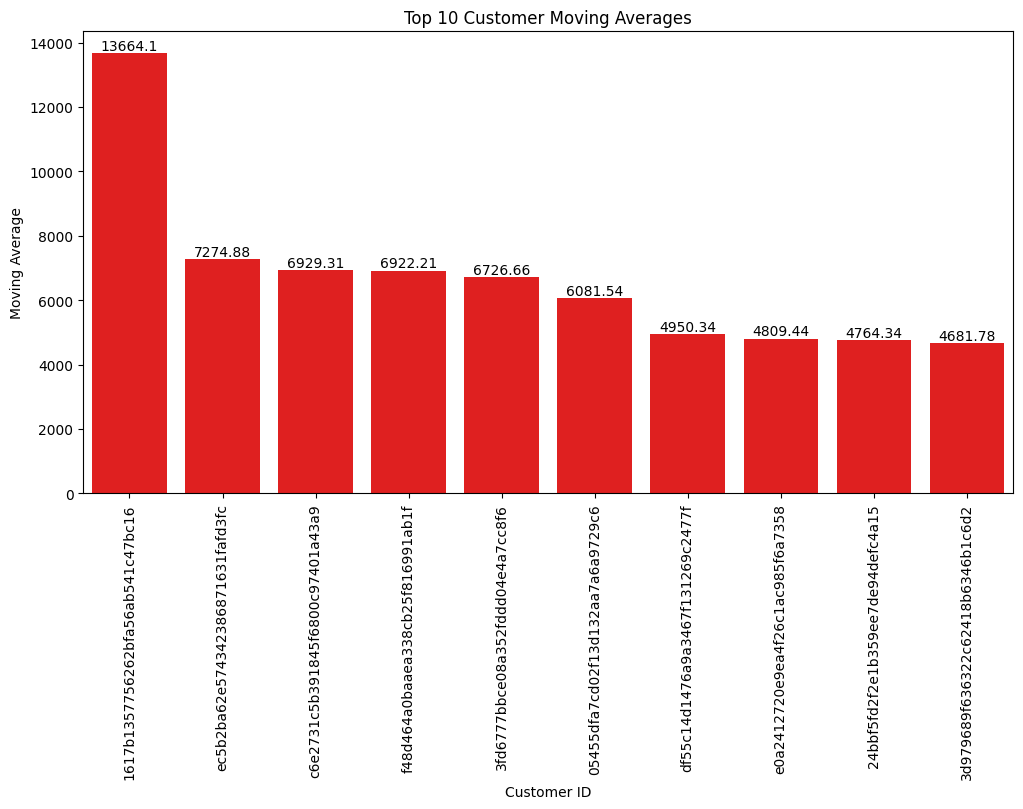

In [35]:
plt.figure(figsize = (12, 6))

ax = sns.barplot(data= df_data10.sort_values(by='moving_avg', ascending=False ).head(10),
           x= 'customer_id',
           y= 'moving_avg',
           
           #hue= 'state',
           #palette='viridis',
           color='red')

ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Top 10 Customer Moving Averages')
plt.xlabel('Customer ID')
plt.ylabel('Moving Average')

plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.show()

The highest moving average of the customer is almost double than that of the customer in the second place. <br>
It can be an interesting to see what the leading customers have an interest in buying for them to be putting out such high moving averages. 

> 2. Calculate the cumulative sales per month for each year.

In [36]:
query11 = """ 
select years, months, payment, sum(payment) 
over(order by years,months) cummalative_sale from

(SELECT year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp)as months,
round(sum(payments.payment_value),2) as payment

from orders join payments on orders.order_id = payments.order_id

group by years, months order by years, months ) as a

"""

cur.execute(query11)

data11 = cur.fetchall()

In [37]:
df_data11 = pd.DataFrame(data11, columns=['year', 'month','payment','cummalative_sale'])
df_data11.head(10)

,year,month,payment,cummalative_sale
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [38]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df_data11['month'] = df_data11['month'].map(month_map)
df_data11

,year,month,payment,cummalative_sale
0,2016,Sep,252.24,252.24
1,2016,Oct,59090.48,59342.72
2,2016,Dec,19.62,59362.34
3,2017,Jan,138488.04,197850.38
4,2017,Feb,291908.01,489758.39
5,2017,Mar,449863.60,939621.99
6,2017,Apr,417788.03,1357410.02
7,2017,May,592918.82,1950328.84
8,2017,Jun,511276.38,2461605.22
9,2017,Jul,592382.92,3053988.14


In [39]:
df_data11['YearMonth'] = df_data11['year'].astype(str) + '-' + df_data11['month']
df_data11.head()

,year,month,payment,cummalative_sale,YearMonth
0,2016,Sep,252.24,252.24,2016-Sep
1,2016,Oct,59090.48,59342.72,2016-Oct
2,2016,Dec,19.62,59362.34,2016-Dec
3,2017,Jan,138488.04,197850.38,2017-Jan
4,2017,Feb,291908.01,489758.39,2017-Feb


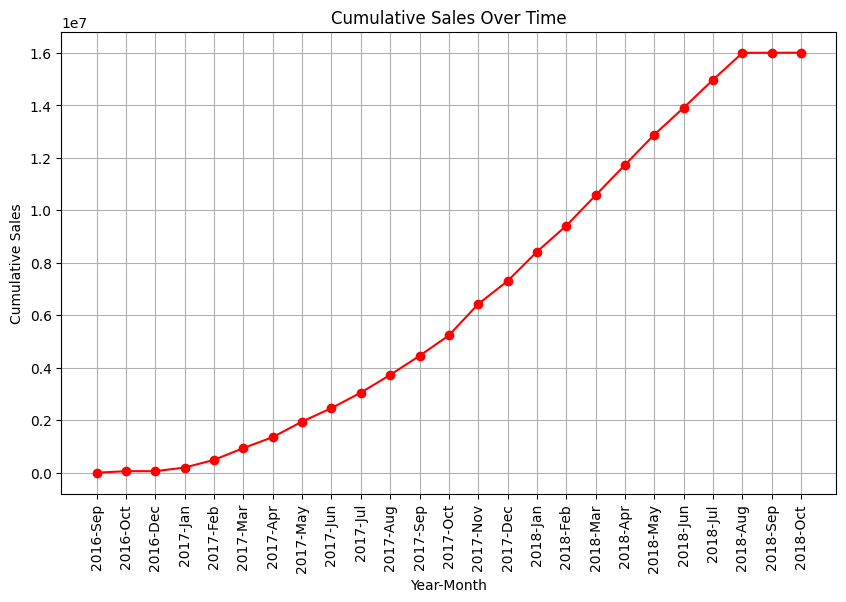

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df_data11['YearMonth'], df_data11['cummalative_sale'], marker='o', linestyle='-', color='red')

plt.xlabel('Year-Month')
plt.ylabel('Cumulative Sales')
plt.title('Cumulative Sales Over Time')

plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The cummalative sales have seen a gradual, almost appearing to be linear, rise in sales. Eventually flattening out from August 2018. Till the new sales data arrive it is can be difficult to point out or guess what might the reason behind the flattening of the sales can be. 

> 3. Calculate the year-over-year growth rate of total sales.


Year-on-year (YoY) growth measures the percentage change in a value compared to the same period in the previous year. It helps in understanding the growth trend and performance over time.

In [41]:
query12 = """ 
with a as(SELECT year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment

from orders join payments on orders.order_id = payments.order_id

group by years order by years)

select years, (payment - lag(payment,1) over(order by years))/lag(payment,1) over(order by years) * 100 from a

"""

cur.execute(query12)

data12 = cur.fetchall()
data12

[(2016, None), (2017, 12112.703761340945), (2018, 20.00092381158259)]

In [42]:
df_data12 = pd.DataFrame(data12, columns=['year','YoY_growth'])
df_data12.head(10)

,year,YoY_growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


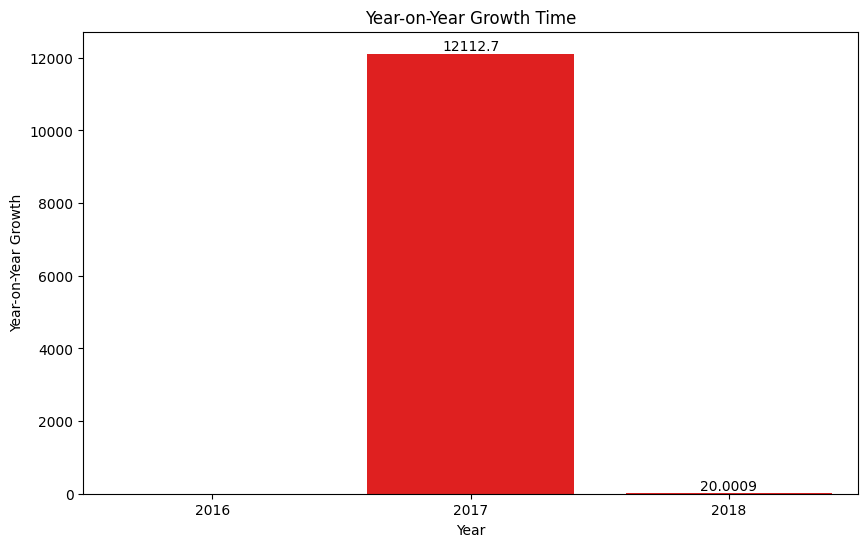

In [43]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='year', y='YoY_growth', data=df_data12, color='red')

ax.bar_label(ax.containers[0], fontsize=10)

plt.xlabel('Year')
plt.ylabel('Year-on-Year Growth')
plt.title('Year-on-Year Growth Time')

plt.xticks(rotation=0)
plt.grid(False)
plt.show()

The three year data shows that 
- 2017: A significant growth of 12112.70% indicates a massive increase in performance or sales compared to 2016. But since we do not have previous data i.e. year 2016. This is understandable and not unexpected.
- 2018: There was growth of 20% as compared to 2017. Whether or not it is good, depends on the stakeholders who had set their targets for growth.

> 4. Calculate the retention rate of customers (defined as the percentage of customers who make another purchase within 6 months of their first purchase).



In [51]:
query13 = """
SELECT customer_unique_id, order_purchase_timestamp as order_dates

FROM customers join orders on customers.customer_id = orders.customer_id 

"""

cur.execute(query13)

df_data13= cur.fetchall()


In [52]:
df_data13 = pd.DataFrame(df_data13, columns=['customer_unique_id','timestamp'])
df_data13['timestamp'] = pd.to_datetime(df_data13['timestamp'])

In [53]:
# first purchase date for each customer
df_data13['first_purchase_date'] = df_data13.groupby('customer_unique_id')['timestamp'].transform('min')
df_data13.shape[0]

99441

In [54]:
df_data13['customer_unique_id'].duplicated().sum()

3345

In [55]:
# days since first purchase
df_data13['days_since_first_purchase'] = (df_data13['timestamp'] - df_data13['first_purchase_date']).dt.days

# checking if there are any purchases within 6 months (180 days)
df_data13['within_6_months'] = df_data13['days_since_first_purchase'] <= 180
df_data13.shape[0]

99441

In [58]:
# Find customers with subsequent purchases within 6 months
retention_df = df_data13[df_data13['days_since_first_purchase'] > 0]
retention_customers = retention_df.groupby('customer_unique_id')['within_6_months'].max().reset_index()

# Calculate retention rate
total_customers = df_data13['customer_unique_id'].nunique()
retained_customers = retention_customers['within_6_months'].sum()

retention_rate = retained_customers / total_customers * 100

print("Total customers:",total_customers)
print("Retained customers:",retained_customers)
print(f"Retention Rate : {retention_rate:.2f}%")


Total customers: 96096
Retained customers 1608
Retention Rate : 1.67%


1.67% (retention rate) of customers shopped again within 6 months of their purchase.

> 5. Identify the top 3 customers who spent the most money in each year.


In [59]:
query14 = """
select 
    years, customer_id, payment, ranking
from 
    (select year(orders.order_purchase_timestamp) years, 
    orders.customer_id, 
    round(sum(payments.payment_value),2) payment,
    dense_rank() over(partition by year(orders.order_purchase_timestamp) 

order by sum(payments.payment_value) desc) ranking

from 
    orders 
    join 
        payments 
    on 
        payments.order_id = orders.order_id

    group by year(orders.order_purchase_timestamp), orders.customer_id) as a

    where ranking <= 3"""

cur.execute(query14)

data14 = cur.fetchall()
data14

[(2016, 'a9dc96b027d1252bbac0a9b72d837fc6', 1423.55, 1),
 (2016, '1d34ed25963d5aae4cf3d7f3a4cda173', 1400.74, 2),
 (2016, '4a06381959b6670756de02e07b83815f', 1227.78, 3),
 (2017, '1617b1357756262bfa56ab541c47bc16', 13664.08, 1),
 (2017, 'c6e2731c5b391845f6800c97401a43a9', 6929.31, 2),
 (2017, '3fd6777bbce08a352fddd04e4a7cc8f6', 6726.66, 3),
 (2018, 'ec5b2ba62e574342386871631fafd3fc', 7274.88, 1),
 (2018, 'f48d464a0baaea338cb25f816991ab1f', 6922.21, 2),
 (2018, 'e0a2412720e9ea4f26c1ac985f6a7358', 4809.44, 3)]

In [60]:
df_data14 = pd.DataFrame(data14, columns=['years', 'customer_id','payment','rank'])
df_data14

,years,customer_id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


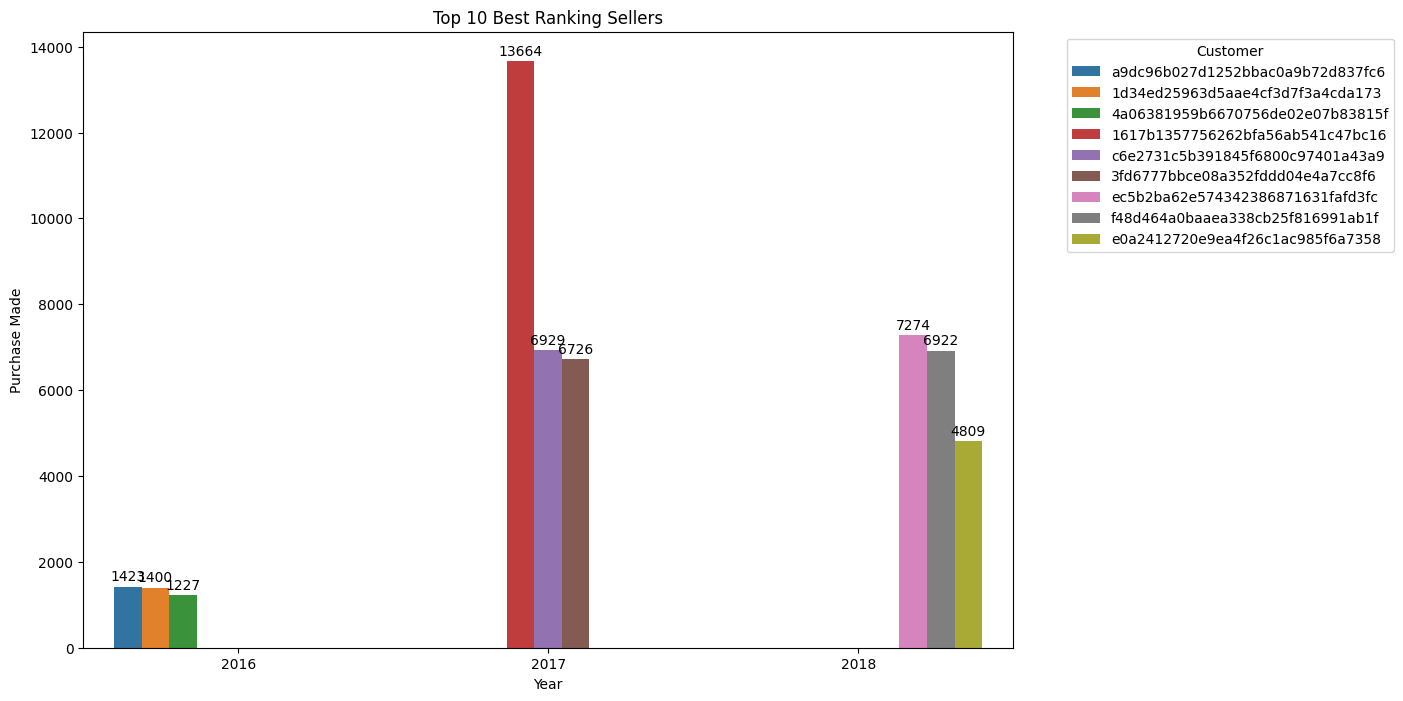

In [63]:
plt.figure(figsize = (12, 8))

ax = sns.barplot(data= df_data14,
           x= 'years',
           y= 'payment',
           hue= 'customer_id',
           #palette='magma',
           dodge=True
                )

#ax.bar_label(ax.containers[0], )
for container in ax.containers:
    ax.bar_label(container, fmt='%d', rotation=0, label_type='edge', padding=2, fontsize=10)
    
plt.title('Top 10 Best Ranking Sellers')
plt.xlabel('Year')
plt.ylabel('Purchase Made')
plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.margins(x=0.01)
plt.xticks(rotation=0)
plt.show()

## Conclusion and Recommendation

- The Target Stores are seeing growth in two successive years in Brazil. 
- The Sao Paulo district is by far the most important district.
- Bedding, Health & Beauty, and Computer Accessories, are the most profitable products contribution to 30% of the total revenue of Target.
- The retention rate is 1.67% only. 

Based on the data analysis, it following few recommendations are made
- To boost the retention rate, it is recommended that consumer behavior may be studied and researched upon. 
- Focus on improving sales and revenue in other districts of Brazil by seeing localized buying trends amongst the masses. 
- Factor out what are the people looking for and how can Target help with their search by conducting surveys.